## Polynomial Regression

In [26]:
import pandas as pd
# suppress Pandas warnings entirely.
pd.set_option('mode.chained_assignment',None)

# importing datasets
df_dataset= pd.read_csv('../../../data/position-salaries.csv')

In [27]:
df_dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


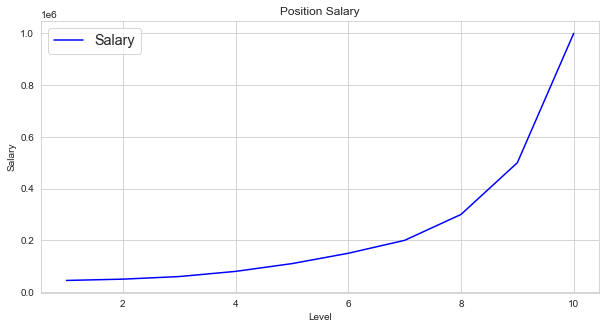

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
fig, axs = plt.subplots(figsize=(10, 5))

# Draw the line
sns.lineplot(x='Level', y='Salary', label='Salary', data=df_dataset, color='blue', ax=axs)

axs.set(title='Position Salary');
axs.legend(loc='upper left', fontsize='x-large')

## Building the Linear regression model

In [29]:
from sklearn.linear_model import LinearRegression

x_features = df_dataset[['Level']]
y_target  = df_dataset[['Salary']]

# Initialize and train the model
slr = LinearRegression()
slr.fit(x_features, y_target['Salary'])

# Make predictions
y_target['Salary (SLR)']= slr.predict(x_features)

# Regression intercept & coefficients
print('Predicted Salary = {:.1f} + {:.1f} * level'.format(slr.intercept_, slr.coef_[0]))

Predicted Salary = -195333.3 + 80878.8 * level


In [30]:
# Check importance for each feature
slr_coeff = pd.DataFrame(
    {
        'Feature': x_features.columns,
        'Coeff': slr.coef_,
        'ABS(Coeff)': abs(slr.coef_),
    }
).set_index('Feature').sort_values('ABS(Coeff)', ascending=False)

slr_coeff

,Coeff,ABS(Coeff)
Feature,,
Level,80878.787879,80878.787879


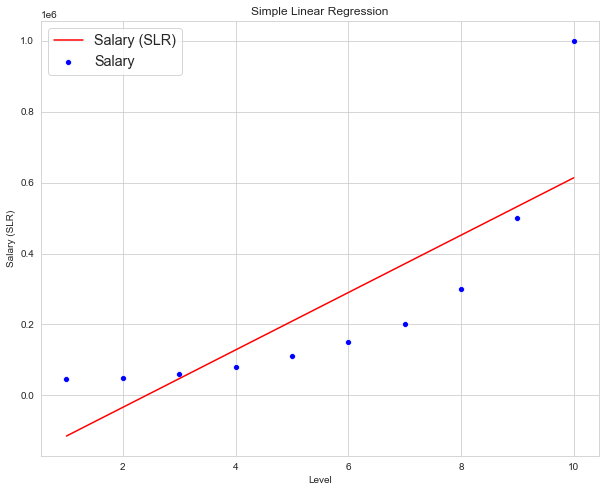

In [31]:
# Visualizing the result for Linear regression
fig, axs = plt.subplots(figsize=(10, 8), sharex=False, sharey=False)

# Draw the data points
sns.scatterplot(x=x_features['Level'], y=y_target['Salary'], label='Salary', color="blue", ax=axs)
# Draw the prediction line
sns.lineplot(x=x_features['Level'], y=y_target['Salary (SLR)'], label='Salary (SLR)', color="red", ax=axs)

axs.set(title='Simple Linear Regression');
axs.legend(loc='upper left', fontsize='x-large')

## In the above output image, we can clearly see that the regression line is so far from the datasets. Predictions are in a red straight line,
## and blue points are actual values. So we need a curved model to fit the dataset other than a straight line.

In [32]:
# Calculate R2, MAE, MSE - Simple Linear Regression
# Higher R2 Score is better (close to 1)
# Lower MAE is better
# Lower MSE is better
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df_metrics = pd.DataFrame(
    {
        'Performance Metric': ['R2 Score','MAE','MSE']
    }
).set_index('Performance Metric')

df_metrics['SLR'] = [
    "{:.3f}".format(r2_score(y_target['Salary'], y_target['Salary (SLR)'])),
    "{:.3f}".format(mean_absolute_error(y_target['Salary'], y_target['Salary (SLR)'])),
    "{:.3f}".format(mean_squared_error(y_target['Salary'], y_target['Salary (SLR)']))
]

df_metrics

,SLR
Performance Metric,
R2 Score,0.669
MAE,128454.545
MSE,26695878787.879


## Building the Polynomial regression model

In [33]:
# Polynomial Regression, degree=3
from sklearn.preprocessing import PolynomialFeatures

# degree=3 to get both the quadratic and cubic feature transformation
pf3 = PolynomialFeatures(degree=3)
x_pf3 = pf3.fit_transform(x_features)
x_pf3

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [34]:
# Reclaim our column names
feature_translator = [(f'x{i}', feature) for i, feature in enumerate(x_features.columns, 0)]

def translate_feature_names(s):
    for key, val in reversed(feature_translator):
        s = s.replace(key, val)
    return s

poly_features = [
    translate_feature_names(f) for f in pf3.get_feature_names_out()
]

x_pf3n = pd.DataFrame(x_pf3, columns=poly_features)

In [35]:
x_pf3n

,1,Level,Level^2,Level^3
0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0
2,1.0,3.0,9.0,27.0
3,1.0,4.0,16.0,64.0
4,1.0,5.0,25.0,125.0
5,1.0,6.0,36.0,216.0
6,1.0,7.0,49.0,343.0
7,1.0,8.0,64.0,512.0
8,1.0,9.0,81.0,729.0
9,1.0,10.0,100.0,1000.0


In [36]:
# Fitting the linear regressor with the derived features
from sklearn.linear_model import LinearRegression

plr3 = LinearRegression(fit_intercept=False)
plr3.fit(x_pf3n, y_target['Salary'])

y_target['Salary (PLR3)'] = plr3.predict(x_pf3n)

In [37]:
y_target

,Salary,Salary (SLR),Salary (PLR3)
0,45000,-114454.545455,14902.097902
1,50000,-33575.757576,78759.906760
2,60000,47303.030303,94960.372960
3,80000,128181.818182,88223.776224
4,110000,209060.606061,83270.396270
5,150000,289939.393939,104820.512820
6,200000,370818.181818,177594.405594
7,300000,451696.969697,326312.354312
8,500000,532575.757576,575694.638695
9,1000000,613454.545455,950461.538461


In [38]:
# Check importance for each feature
plr3_coeff = pd.DataFrame(
    {
        'Feature': x_pf3n.columns,
        'Coeff': plr3.coef_,
        'ABS(Coeff)': abs(plr3.coef_),
    }
).set_index('Feature').sort_values('ABS(Coeff)', ascending=False)

plr3_coeff

,Coeff,ABS(Coeff)
Feature,,
Level,180664.335664,180664.335664
1,-121333.333333,121333.333333
Level^2,-48548.951049,48548.951049
Level^3,4120.046620,4120.046620


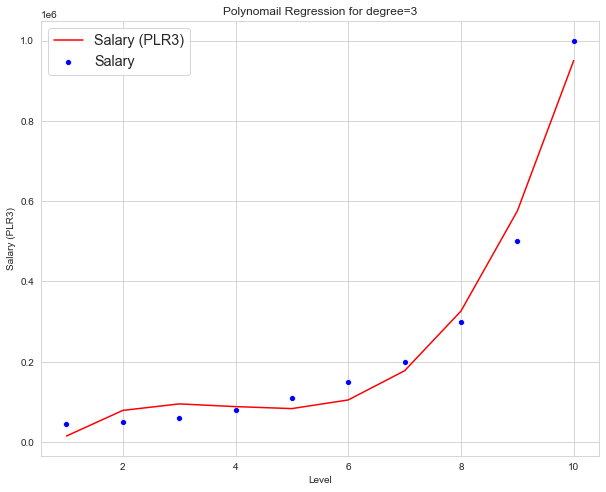

In [39]:
# Visualizing the result for polynomial regression, degree=3
fig, axs = plt.subplots(figsize=(10, 8), sharex=False, sharey=False)

# Draw the data points
sns.scatterplot(x=x_pf3n['Level'], y=y_target['Salary'], label='Salary', color="blue", ax=axs)
# Draw the prediction line
sns.lineplot(x=x_pf3n['Level'], y=y_target['Salary (PLR3)'], label='Salary (PLR3)', color="red", ax=axs)

axs.set(title='Polynomail Regression for degree=3');
axs.legend(loc='upper left', fontsize='x-large')

## As we can see in the above output image, the predictions are close to the real values. The above plot will vary as we will change the degree.

In [40]:
# Calculate R2, MAE, MSE - Polynomial Linear Regression, degree=3
# Higher R2 Score is better (close to 1)
# Lower MAE is better
# Lower MSE is better

df_metrics['PLR3'] = [
    "{:.3f}".format(r2_score(y_target['Salary'], y_target['Salary (PLR3)'])),
    "{:.3f}".format(mean_absolute_error(y_target['Salary'], y_target['Salary (PLR3)'])),
    "{:.3f}".format(mean_squared_error(y_target['Salary'], y_target['Salary (PLR3)']))
]

df_metrics

,SLR,PLR3
Performance Metric,,
R2 Score,0.669,0.981
MAE,128454.545,34790.210
MSE,26695878787.879,1515662004.662


In [41]:
# Polynomial Regression, degree=4
from sklearn.preprocessing import PolynomialFeatures

# degree=4 to get both the quadratic and cubic feature transformation
pf4 = PolynomialFeatures(degree=4)
x_pf4 = pf4.fit_transform(x_features)
x_pf4

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [42]:
# Reclaim our column names
feature_translator = [(f'x{i}', feature) for i, feature in enumerate(x_features.columns, 0)]

def translate_feature_names(s):
    for key, val in reversed(feature_translator):
        s = s.replace(key, val)
    return s

poly_features = [
    translate_feature_names(f) for f in pf4.get_feature_names_out()
]

x_pf4n = pd.DataFrame(x_pf4, columns=poly_features)

In [43]:
x_pf4n

,1,Level,Level^2,Level^3,Level^4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0
2,1.0,3.0,9.0,27.0,81.0
3,1.0,4.0,16.0,64.0,256.0
4,1.0,5.0,25.0,125.0,625.0
5,1.0,6.0,36.0,216.0,1296.0
6,1.0,7.0,49.0,343.0,2401.0
7,1.0,8.0,64.0,512.0,4096.0
8,1.0,9.0,81.0,729.0,6561.0
9,1.0,10.0,100.0,1000.0,10000.0


In [44]:
# Fitting the linear regressor with the derived features
from sklearn.linear_model import LinearRegression

plr4 = LinearRegression(fit_intercept=False)
plr4.fit(x_pf4n, y_target['Salary'])

y_target['Salary (PLR4)'] = plr4.predict(x_pf4n)

In [45]:
y_target

,Salary,Salary (SLR),Salary (PLR3),Salary (PLR4)
0,45000,-114454.545455,14902.097902,53356.643357
1,50000,-33575.757576,78759.906760,31759.906760
2,60000,47303.030303,94960.372960,58642.191142
3,80000,128181.818182,88223.776224,94632.867133
4,110000,209060.606061,83270.396270,121724.941725
5,150000,289939.393939,104820.512820,143275.058275
6,200000,370818.181818,177594.405594,184003.496503
7,300000,451696.969697,326312.354312,289994.172494
8,500000,532575.757576,575694.638695,528694.638695
9,1000000,613454.545455,950461.538461,988916.083916


In [46]:
# Check importance for each feature
plr4_coeff = pd.DataFrame(
    {
        'Feature': x_pf4n.columns,
        'Coeff': plr4.coef_,
        'ABS(Coeff)': abs(plr4.coef_),
    }
).set_index('Feature').sort_values('ABS(Coeff)', ascending=False)

plr4_coeff

,Coeff,ABS(Coeff)
Feature,,
Level,-211002.331002,211002.331002
1,184166.666667,184166.666667
Level^2,94765.442890,94765.442890
Level^3,-15463.286713,15463.286713
Level^4,890.151515,890.151515


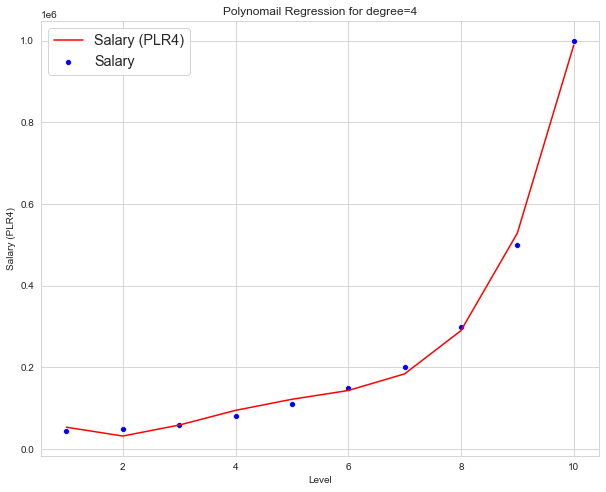

In [47]:
# Visualizing the result for polynomial regression, degree=4
fig, axs = plt.subplots(figsize=(10, 8), sharex=False, sharey=False)
# Draw the data points
sns.scatterplot(x=x_pf4n['Level'], y=y_target['Salary'], label='Salary', color="blue", ax=axs)
# Draw the prediction line
sns.lineplot(x=x_pf4n['Level'], y=y_target['Salary (PLR4)'], label='Salary (PLR4)', color="red", ax=axs)

axs.set(title='Polynomail Regression for degree=4');
axs.legend(loc='upper left', fontsize='x-large')

## If we change the degree=4, then we will give a more accurate plot, as shown in the below image.
## Hence we can get more accurate results by increasing the degree of Polynomial.

In [48]:
# Calculate R2, MAE, MSE - Polynomial Regression degree=4
# Higher R2 Score is better (close to 1)
# Lower MAE is better
# Lower MSE is better

df_metrics['PLR4'] = [
    "{:.3f}".format(r2_score(y_target['Salary'], y_target['Salary (PLR4)'])),
    "{:.3f}".format(mean_absolute_error(y_target['Salary'], y_target['Salary (PLR4)'])),
    "{:.3f}".format(mean_squared_error(y_target['Salary'], y_target['Salary (PLR4)']))
]

df_metrics

,SLR,PLR3,PLR4
Performance Metric,,,
R2 Score,0.669,0.981,0.997
MAE,128454.545,34790.210,12681.818
MSE,26695878787.879,1515662004.662,210343822.844


## Predicting the final result with the Linear Regression model

In [49]:
# Now, we will predict the final output using the Linear regression model.
# So, for this, we will use the predict() method and will pass the value 6.5.
slr_pred = slr.predict([[6.5]])
print(slr_pred)

[330378.78787879]


/Users/dmmil/.pyenv/versions/env3.10.8/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
# Now, we will predict the final output using the Polynomial Regression model to compare with Linear model.
plr4_pred = plr4.predict(pf4.fit_transform([[6.5]]))
print(plr4_pred)

[158862.45265146]


/Users/dmmil/.pyenv/versions/env3.10.8/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
